In [1]:
conn<-file('notebook_styling.R')
writeLines(paste0(
    "IRdisplay::display_html('<style>@import ",intToUtf8(34),
    "https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d",
    intToUtf8(34),"; body {background:gainsboro;}",
    "span {text-shadow:4px 4px 4px #aaa;}",
    "div.output_prompt {color:slategray; font-family:Ewert;}",
    "div.output_area pre {color:slategray;}",
    "div.input_prompt {color:#ff355e; font-family:Ewert;}",
    "div.output_subarea {color:#ff355e;}",     
    "div.output_stderr pre {background-color:gainsboro;}", 
    "div.output_stderr {background-color:slategrey;}",  
    "</style>')"),conn)

In [2]:
conn<-file('header_styling.R')
writeLines(paste0("dhtml<-function(str) {
    IRdisplay::display_html(paste0(c(
'<style>@import ",intToUtf8(34),"https://fonts.googleapis.com/css?",
"family=Ewert|Roboto&effect=3d",intToUtf8(34),"; ',
'</style><h1 class=",intToUtf8(34),"font-effect-3d",intToUtf8(34),
" style=",intToUtf8(34),"font-family:Ewert; color:#ff355e;",
 intToUtf8(34),"> &#x1F310; &nbsp;',str,'</h1>'),collapse='')) }"),
conn)

In [3]:
source('header_styling.R')
dhtml('Styling, Links and Modules')

🌐  Styling, Links and Modules

In [4]:
source('notebook_styling.R')

#### [Keras](https://keras.rstudio.com/) & [Training Visualization](https://cran.r-project.org/web/packages/keras/vignettes/training_visualization.html) & [Getting started with imager](https://dahtah.github.io/imager/gettingstarted.html)
#### [Extended version. Python](https://olgabelitskaya.github.io/kaggle_flowers.html) & [Extended version. R](https://olgabelitskaya.github.io/kaggle_flowers_R.html)
#### [Github Repository](https://github.com/OlgaBelitskaya/deep_learning_projects/tree/master/DL_PP0) & [Colaboratory Version](https://colab.research.google.com/drive/1H2ArWH_1kYfkIoCbxleX-aHAozRVBAdB)

In [5]:
dhtml('Data Exploration')

🌐  Data Exploration

In [6]:
conn<-file('load_flower_data.R')
writeLines("
file_path<-paste0('../input/flower-color-images/',
                  'flower_images/flower_images')
flowers<-read.csv(paste0(file_path,'/flower_labels.csv'))
n<-nrow(flowers)
flower_labels<-as.matrix(flowers['label'])
image_paths<-list.files(
    file_path,recursive=TRUE,full.names=TRUE)
image_paths<-image_paths[1:(length(image_paths)-1)]
image_loading<-function(image_path) {
    image<-keras::image_load(image_path,target_size=c(128,128))
    image<-keras::image_to_array(image)/255
    image<-keras::array_reshape(image,c(1,dim(image)))
    return(image) }
flower_images<-lapply(image_paths,image_loading)
flower_images<-keras::array_reshape(
    flower_images,c(-1,128,128,3))
print(paste0(c('image array: ',dim(flower_images),
             '; label array: ',dim(flower_labels)),
             collapse=' ')); cat('\n\n')
print(tail(image_paths)); cat('\n\n')
print(t(head(flowers))); cat('\n\n')
dd<-c(-1,128*128*3); indices<-sample(1:n)
train_indices<-indices[1:round(.7*n)]
valid_indices<-indices[(round(.7*n)+1):round(.85*n)]
test_indices<-indices[(round(.85*n)+1):n]
flower_images<-keras::array_reshape(flower_images,dd)
x_train<-flower_images[train_indices,]
x_train<-keras::array_reshape(x_train,c(-1,128,128,3))
y_train<-flower_labels[train_indices]
x_valid<-flower_images[valid_indices,]
x_valid<-keras::array_reshape(x_valid,c(-1,128,128,3))
y_valid<-flower_labels[valid_indices]
x_test<-flower_images[test_indices,]
x_test<-keras::array_reshape(x_test,c(-1,128,128,3))
y_test<-flower_labels[test_indices]
print(paste0(c('processed image arrays: ',dim(x_train),', ',
               dim(x_valid),', ',dim(x_test)),collapse=' '))
print(paste0(c('processed label arrays: ',length(y_train),', ',
               length(y_valid),', ',length(y_test)),
             collapse=' '))
",conn)

In [7]:
source('load_flower_data.R')

[1] "image array:  210 128 128 3 ; label array:  210 1"


[1] "../input/flower-color-images/flower_images/flower_images/0205.png"
[2] "../input/flower-color-images/flower_images/flower_images/0206.png"
[3] "../input/flower-color-images/flower_images/flower_images/0207.png"
[4] "../input/flower-color-images/flower_images/flower_images/0208.png"
[5] "../input/flower-color-images/flower_images/flower_images/0209.png"
[6] "../input/flower-color-images/flower_images/flower_images/0210.png"


      1          2          3          4          5          6         
file  "0001.png" "0002.png" "0003.png" "0004.png" "0005.png" "0006.png"
label "0"        "0"        "2"        "0"        "0"        "1"       


[1] "processed image arrays:  147 128 128 3 ,  31 128 128 3 ,  32 128 128 3"
[1] "processed label arrays:  147 ,  31 ,  32"


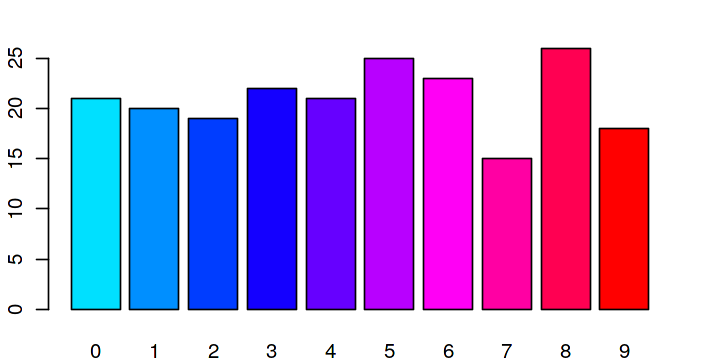

In [8]:
library(magrittr)
par(mar=c(2,2,2,2))
options(repr.plot.width=6,repr.plot.height=3)
flower_labels[,1] %>% 
    table() %>% barplot(col=rainbow(10,start=.52,end=1))

In [9]:
conn<-file('display_flower_data.R')
writeLines("
file_path<-paste0('../input/flower-color-images/',
                  'flower_images/flower_images/')
img_path<-paste0(file_path,'0001.png')
img<-keras::image_load(img_path,target_size=c(128,128))
img<-keras::image_to_array(img)/255
im<-imager::load.image(img_path)
str<-c('keras: ',dim(img),'; imager: ',dim(im))
cat(paste0(str,collapse=' '))
options(repr.plot.width=6,repr.plot.height=6)
par(mar=c(2,2,2,2),mfrow=c(2,2))
plot(im,axes=FALSE); plot(as.raster(img))
gray_img<-keras::image_load(
    img_path,target_size=c(128,128),grayscale=TRUE)
gray_img<-keras::image_to_array(gray_img)/255
gray_img<-keras::array_reshape(gray_img,c(128,128))
cat(paste0(c('keras grayscale: ',dim(gray_img))))
image(c(1:128),c(1:128),gray_img,
      col=grey(seq(0,1,length=256)))",conn)

keras:  128 128 3 ; imager:  128 128 1 4keras grayscale:  128 128

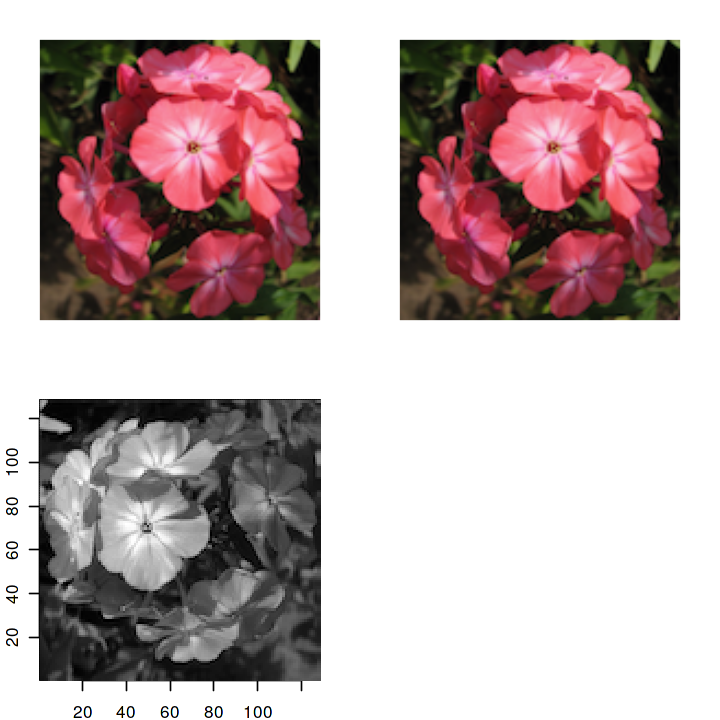

In [10]:
source('display_flower_data.R')

In [11]:
dhtml('Classification Models')

🌐  Classification Models

In [12]:
conn<-file('keras_callbacks.R')
writeLines("
library(keras)
model_weights<-'/checkpoints'
cb<-function(model_weights){
    checkpoint<-callback_model_checkpoint(
        model_weights,monitor='val_loss',mode='min',
        save_best_only=TRUE,save_weights_only=TRUE)
    reduce_lr<-callback_reduce_lr_on_plateau(
        monitor='val_loss',factor=.75)
    early_stopping<-callback_early_stopping(
        monitor='val_acc',patience=120)
    return(list(checkpoint,reduce_lr,early_stopping))}
",conn)

In [13]:
conn<-file('display_keras_history.R')
writeLines("
library(keras)
display_keras_history<-function(history) {
    options(repr.plot.width=6,repr.plot.height=4,warn=-1)
    theme<-ggplot2::theme_grey()
    scale_fill<-ggplot2::scale_fill_manual(
        values=c('slategray','#ff355e'))
    scale_color<-ggplot2::scale_color_manual(
        values=c('slategray','#ff355e'))
    plot(history,metrics=c('loss','acc','lr'))+
    scale_fill+scale_color+theme }
",conn)

In [14]:
conn<-file('mlp_model.R')
writeLines("
library(magrittr); library(keras)
mlp_model<-keras_model_sequential()
mlp_model %>%  
layer_dense(128,input_shape=c(128*128*3)) %>%  
layer_activation_leaky_relu(.2) %>%  
layer_batch_normalization() %>%  
layer_dense(256) %>%  
layer_activation_leaky_relu(.2) %>%  
layer_batch_normalization() %>%
layer_dense(512) %>%  
layer_activation_leaky_relu(.2) %>%  
layer_batch_normalization() %>%
layer_dense(1024) %>%  
layer_activation('relu') %>%  
layer_dropout(.2) %>% 
layer_dense(10) %>%    
layer_activation('softmax')
mlp_model %>%
    compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',metrics='accuracy')
mlp_fit<-mlp_model %>%
    fit(x=array_reshape(x_train,dd),y=y_train,shuffle=TRUE,
        batch_size=24,epochs=120,callbacks=cb(model_weights),
        validation_data=list(array_reshape(x_valid,dd),y_valid))
",conn)

In [15]:
source('keras_callbacks.R')
source('mlp_model.R')
summary(mlp_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 128)                     6291584     
________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)           (None, 128)                     0           
________________________________________________________________________________
batch_normalization_1 (BatchNormali (None, 128)                     512         
________________________________________________________________________________
dense_2 (Dense)                     (None, 256)                     33024       
________________________________________________________________________________
leaky_re_lu_2 (LeakyReLU)           (None, 256)                     0           
________________________________________________________________________________
batch_normalization_2 (Batch

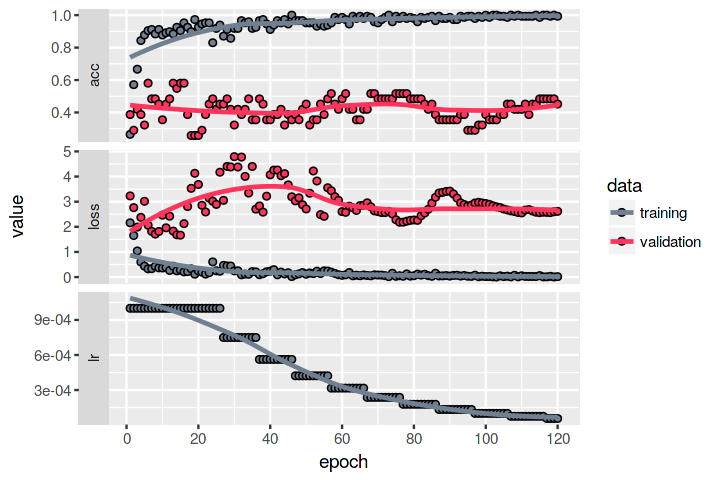

In [16]:
source('display_keras_history.R')
display_keras_history(mlp_fit)

In [17]:
as.data.frame(mlp_fit)[341:360,]

,epoch,value,metric,data
341,101,0.3548387,acc,validation
342,102,0.3548387,acc,validation
343,103,0.3548387,acc,validation
344,104,0.3870968,acc,validation
345,105,0.3870968,acc,validation
346,106,0.4516129,acc,validation
347,107,0.4516129,acc,validation
348,108,0.4193549,acc,validation
349,109,0.4193549,acc,validation
350,110,0.4193549,acc,validation


In [18]:
load_model_weights_hdf5(mlp_model,model_weights)
mlp_model %>% 
    evaluate(array_reshape(x_test,dd),y_test)

$loss
[1] 2.067138

$acc
[1] 0.40625

In [19]:
conn<-file('cnn_model.R')
writeLines("
library(magrittr); library(keras)
cnn_model<-keras_model_sequential()
cnn_model %>%  
layer_conv_2d(
    filter=32,kernel_size=c(7,7),padding='same',
    input_shape=c(128,128,3)) %>%  
layer_activation_leaky_relu(.2) %>%  
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(.25) %>%
layer_conv_2d(
    filter=96,kernel_size=c(7,7),padding='same') %>% 
layer_activation_leaky_relu(.2) %>%
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(.25) %>%
layer_global_average_pooling_2d() %>%  
layer_dense(1024) %>%  
layer_activation('tanh') %>%  
layer_dropout(.25) %>%  
layer_dense(64) %>%  
layer_activation('tanh') %>%  
layer_dropout(.25) %>%
layer_dense(10) %>%    
layer_activation('softmax')
cnn_model %>%
    compile(loss='sparse_categorical_crossentropy',
            optimizer='nadam',metrics='accuracy')
cnn_fit<-cnn_model %>%
    fit(x=x_train,y=y_train,shuffle=TRUE,
        batch_size=16,epochs=150,callbacks=cb(model_weights),
        validation_data=list(x_valid,y_valid))
",conn)

In [20]:
source('keras_callbacks.R')
source('cnn_model.R')
summary(cnn_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 128, 128, 32)            4736        
________________________________________________________________________________
leaky_re_lu_4 (LeakyReLU)           (None, 128, 128, 32)            0           
________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)      (None, 64, 64, 32)              0           
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 64, 64, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 64, 64, 96)              150624      
________________________________________________________________________________
leaky_re_lu_5 (LeakyReLU)   

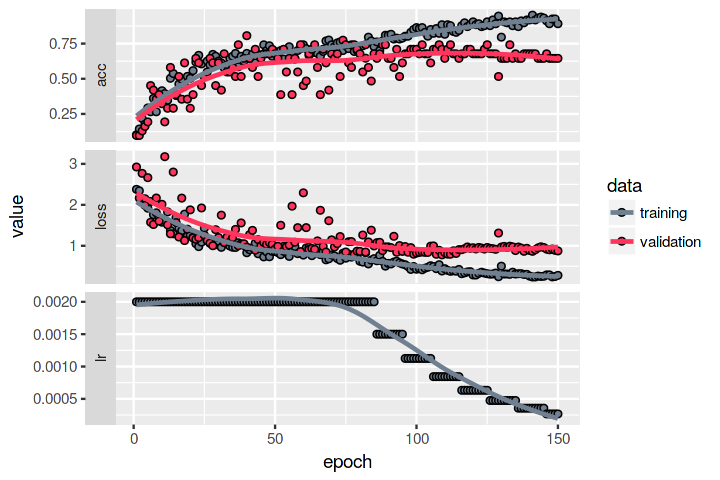

In [21]:
source('display_keras_history.R')
display_keras_history(cnn_fit)

In [22]:
as.data.frame(cnn_fit)[431:450,1:4]

,epoch,value,metric,data
431,131,0.6451613,acc,validation
432,132,0.6451613,acc,validation
433,133,0.7419355,acc,validation
434,134,0.6451613,acc,validation
435,135,0.6774194,acc,validation
436,136,0.6451613,acc,validation
437,137,0.6451613,acc,validation
438,138,0.6774194,acc,validation
439,139,0.6774194,acc,validation
440,140,0.6774194,acc,validation


In [23]:
load_model_weights_hdf5(cnn_model,model_weights)
cnn_model %>% evaluate(x_test,y_test)

$loss
[1] 0.8312351

$acc
[1] 0.78125

In [24]:
conn<-file('rnn_model.R')
writeLines("
library(magrittr); library(keras)
rnn_model<-keras_model_sequential()
rnn_model %>% 
layer_batch_normalization(input_shape=c(1,128*128*3)) %>% 
layer_lstm(196,return_sequences=TRUE) %>%  
layer_lstm(196,return_sequences=TRUE) %>%
layer_lstm(196) %>%
layer_batch_normalization() %>% 
layer_dense(1024) %>%
layer_activation('relu') %>%
layer_dropout(.5) %>% 
layer_dense(10) %>%    
layer_activation('softmax')
rnn_model %>%
    compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',metrics='accuracy')
dd2<-c(-1,1,128*128*3)
rnn_fit<-rnn_model %>%
    fit(x=array_reshape(x_train,dd2),y=y_train,shuffle=TRUE,
        batch_size=64,epochs=200,callbacks=cb(model_weights),
        validation_data=list(array_reshape(x_valid,dd2),y_valid))
",conn)

In [25]:
source('keras_callbacks.R')
source('rnn_model.R')
summary(rnn_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
batch_normalization_4 (BatchNormali (None, 1, 49152)                196608      
________________________________________________________________________________
lstm_1 (LSTM)                       (None, 1, 196)                  38689616    
________________________________________________________________________________
lstm_2 (LSTM)                       (None, 1, 196)                  308112      
________________________________________________________________________________
lstm_3 (LSTM)                       (None, 196)                     308112      
________________________________________________________________________________
batch_normalization_5 (BatchNormali (None, 196)                     784         
________________________________________________________________________________
dense_9 (Dense)             

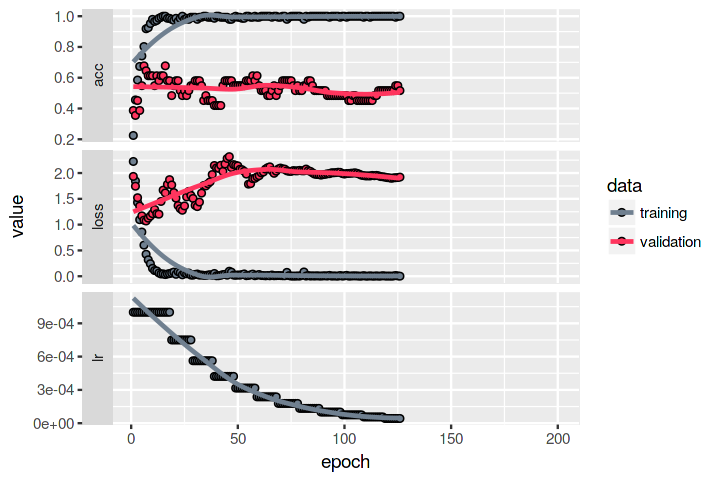

In [26]:
source('display_keras_history.R')
display_keras_history(rnn_fit)

In [27]:
as.data.frame(rnn_fit)[531:550,1:4]

,epoch,value,metric,data
531,131,NA,acc,validation
532,132,NA,acc,validation
533,133,NA,acc,validation
534,134,NA,acc,validation
535,135,NA,acc,validation
536,136,NA,acc,validation
537,137,NA,acc,validation
538,138,NA,acc,validation
539,139,NA,acc,validation
540,140,NA,acc,validation


In [28]:
load_model_weights_hdf5(rnn_model,model_weights)
rnn_model %>% evaluate(array_reshape(x_test,dd2),y_test)

$loss
[1] 1.040198

$acc
[1] 0.65625